In [1]:
%matplotlib widget
# %matplotlib inline

import numpy as np
import cmath
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.qucf_read as qucf_r
import pylib.measurement as mse

2917
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# ---------------------------------------------------------------------------------------------------
# --- Some global parameters ---
# ---------------------------------------------------------------------------------------------------
colors_ = ["b", "r", "g", "magenta", "black"]
path_qucf_ = "../QuCF/simulations/LCHS/KvN/"
for _ in range(30):
    plt.close()

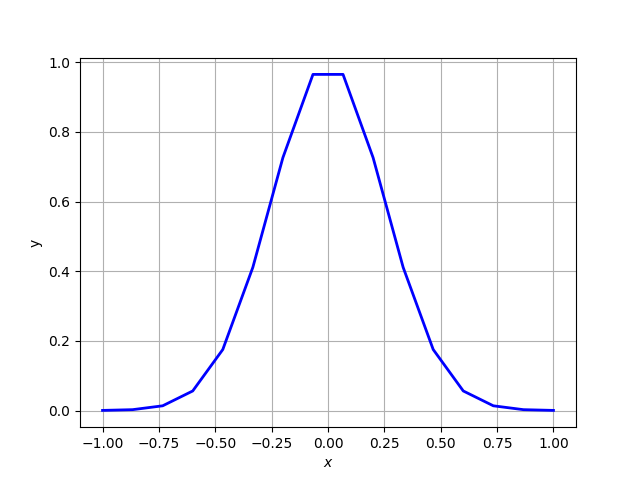

In [3]:
# -------------------------------------------
# --- Reference signals ---
# -------------------------------------------
def func_gauss(w,c):
    return np.exp(-(x-c)**2/(2.*w**2))

nx = 4
Nx = 1 << nx

x = np.linspace(-1.0, 1.0, Nx)

wL, cL = 0.25, 0.0
y_ref = func_gauss(wL, cL)

# wL, cL = 0.2, -0.4
# y_ref_left = func_gauss(wL, cL)

# wR, cR = 0.2, 0.4
# y_ref_right = func_gauss(wR, cR)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y_ref,  "-b", linewidth = 2)
# ax.plot(x, y_ref_left,  "-b", linewidth = 2, label = "left")
# ax.plot(x, y_ref_right, "-r",    linewidth = 2, label = "right")
plt.xlabel('$x$')
plt.ylabel("y")
# ax.legend()
plt.grid(True)
plt.show()

In [5]:
# --- Compute angles for the weights ---
print("\n//--- Angles for the weight-oracle ---")
alpha_k0 = - 1.0
alpha_k1 = np.abs(alpha_k0) * Nx/(Nx - 1)

print("nx \t{:d}".format(nx))
print("\nalpha_0 \t{:0.12e}".format(alpha_k0))
print("alpha_1 \t{:0.12e}".format(alpha_k1))

alpha_k0 = - 0.5
alpha_k1 = 1.5/2. * Nx/(Nx - 1)

print("\nalpha_02 \t{:0.12e}".format(alpha_k0))
print("alpha_12 \t{:0.12e}".format(alpha_k1))

print("\nint_half_m \t{:d}".format(2**(nx-1)-1))


//--- Angles for the weight-oracle ---
nx 	4

alpha_0 	-1.000000000000e+00
alpha_1 	1.066666666667e+00

alpha_02 	-5.000000000000e-01
alpha_12 	8.000000000000e-01

int_half_m 	7


Reading the file /media/work/docs/codes/QuCF/QuCF/tests/test_jumps//jumps_OUTPUT.hdf5...
Name of the simulation is jumps
Simulation has been performed  06-24-2024 16:39:15

QC prob.: 1.792e-01


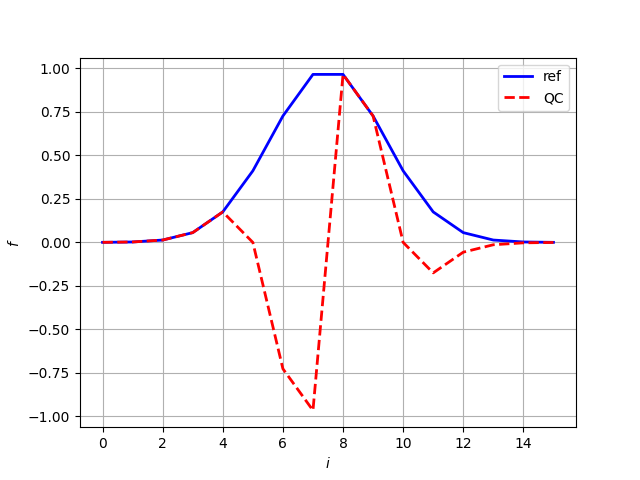

In [19]:
# ------------------------------------------------
# --- Compare with QuCF simulations ---
# ------------------------------------------------
mix.reload_module(mse)


om = mse.MeasOracle__(True)

om.path_  = "/media/work/docs/codes/QuCF/QuCF/tests/test_jumps/"
om.pname_ = "jumps"
om.open()

# om.set_zero_ancillae_work_states(0)
# qc_data_full = om.get_var_x({}, "j")

om.set_work_states(0)
# qc_data_full = om.get_var_x({"a_comp": 0}, "j")
qc_data_full = om.get_var_x({"a_comp": 0}, "j")

print()
print("QC prob.: {:0.3e}".format(np.sum( np.abs(qc_data_full)**2 ) ))


# --- QuCF data ---
y_qucf = -np.array(qc_data_full.real)

om.read_qsvt()

y_qucf *= 2**(nx/2.) / 0.98

# --- Plotting ---
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(Nx), y_ref, color='b', linewidth = 2, linestyle='-', label = "ref")
ax.plot(range(Nx), y_qucf, color='r', linewidth = 2, linestyle='--',  label = "QC")
plt.xlabel('$i$')
plt.ylabel("$f$")
ax.legend()
plt.grid(True)
plt.show()